In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, AvgPool2D , BatchNormalization, MaxPooling2D
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [3]:
DATA_PATH = '/content/Sign-Language-Digits-Dataset/Dataset'

In [4]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for number in numbers:
    #create directory for test data as number_Test
    path = DATA_PATH + '/' + number + '_Test'
    if  not os.path.exists(path):
        os.mkdir(path)

In [5]:
for number in numbers:
    path = DATA_PATH + '/' + number
    num_files = len(os.listdir(path))
    test_path = DATA_PATH + '/' + number + '_Test'
    indices_taken = np.random.choice(num_files, int(num_files*0.2), replace=False)
    for i in range(len(os.listdir(path))):
        if i in indices_taken:
            shutil.copy(path+"/"+os.listdir(path)[i], test_path)
    for file in os.listdir(test_path):
        if file in os.listdir(path):
            os.remove(path+"/"+file)

In [6]:
os.mkdir(DATA_PATH+"/"+"Train")
os.mkdir(DATA_PATH+"/"+"Test")

In [7]:
for number in numbers:
    path = DATA_PATH + '/' + number + '_Test'
    to_path = DATA_PATH+ "/" + "Test"
    shutil.move(path,to_path)

In [8]:
for number in numbers:
    path = DATA_PATH + '/' + number
    to_path = DATA_PATH+ "/" + "Train"
    shutil.move(path,to_path)

In [9]:
for number in numbers:
    path = DATA_PATH + "/" + "Test" + "/" + number + "_Test"
    #remove all files from test directory to numbers
    new_name = path.replace("_Test",'')
    os.rename(path, new_name)

In [10]:
TRAIN_PATH = DATA_PATH + "/" + "Train"
TEST_PATH = DATA_PATH + "/" + "Test"

In [11]:
# read from train path 
import cv2
path = '/content/Sign-Language-Digits-Dataset/Dataset/Train'
img_dict = dict()

for root, dirs, files in os.walk(path):
    print(os.path.basename(root))
    my_key = os.path.basename(root)
    dir_images = []
    for file_ in files :
      # if root != "/content/Sign-Language-Digits-Dataset/Dataset/Train/9":
        full_file_path = os.path.join(root, file_)
        img = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
        # img = cv2.cvtColor(img)
        # resize image
        img = cv2.resize(img, (100,100))
        dir_images.append(img)
    img_dict[my_key] = dir_images

Train
4
0
3
8
6
5
9
2
1
7


In [12]:
print(list(img_dict.keys())[1:])
length = []
for i in range(0,10):
  length.append(len(img_dict[str(i)]))
y_train = []
for i in list(img_dict.keys())[1:]:
  for x in range(length[int(i)]):
    y_train.append(int(i))
y_train = np.array(y_train)
len(y_train)

['4', '0', '3', '8', '6', '5', '9', '2', '1', '7']


1653

In [13]:
# convert dict into array of arrays 
x_train = np.array([np.array(item) for item in img_dict.values()])
x_train.shape 

<ipython-input-13-ae130671bbcc>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array([np.array(item) for item in img_dict.values()])


(11,)

In [14]:
x_train = np.vstack(x_train[1:])
x_train

array([[[142, 145, 147, ..., 120, 118, 116],
        [143, 146, 148, ..., 122, 119, 117],
        [145, 147, 150, ..., 124, 121, 119],
        ...,
        [126, 127, 128, ..., 103, 101, 100],
        [125, 126, 127, ..., 101, 100,  99],
        [124, 125, 126, ..., 100,  99,  98]],

       [[129, 131, 133, ..., 112, 110, 109],
        [130, 132, 134, ..., 113, 111, 110],
        [132, 134, 136, ..., 115, 112, 110],
        ...,
        [118, 119, 121, ..., 109, 107, 106],
        [115, 117, 118, ..., 107, 105, 104],
        [113, 114, 116, ..., 106, 104, 103]],

       [[111, 114, 117, ..., 100,  96,  93],
        [113, 115, 118, ..., 103,  99,  97],
        [114, 116, 119, ..., 104, 101,  98],
        ...,
        [119, 122, 125, ...,  97,  95, 109],
        [118, 121, 124, ..., 101, 104, 112],
        [117, 119, 122, ..., 109, 111, 110]],

       ...,

       [[125, 125, 126, ..., 114, 112, 111],
        [125, 126, 127, ..., 114, 113, 112],
        [126, 127, 129, ..., 115, 113, 112

In [15]:
print(x_train.shape)
print(np.array(y_train).shape)

(1653, 100, 100)
(1653,)


In [16]:
# read from train path 
import cv2
path = '/content/Sign-Language-Digits-Dataset/Dataset/Test'
test_dict = dict()

for root, dirs, files in os.walk(path):
    print(os.path.basename(root))
    my_key = os.path.basename(root)
    dir_images = []
    for file_ in files :
      # if root != "/content/Sign-Language-Digits-Dataset/Dataset/Train/9":
        full_file_path = os.path.join(root, file_)
        img = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
        # img = cv2.cvtColor(img)
        # resize image
        img = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
        dir_images.append(img)
    test_dict[my_key] = dir_images

Test
4
0
3
8
6
5
9
2
1
7


In [17]:
print(list(test_dict.keys())[1:])
length = []
for i in range(0,10):
  length.append(len(test_dict[str(i)]))
y_test = []
for i in list(test_dict.keys())[1:]:
  for x in range(length[int(i)]):
    y_test.append(int(i))
y_test = np.array(y_test)
len(y_test)

['4', '0', '3', '8', '6', '5', '9', '2', '1', '7']


409

In [18]:
# convert dict into array of arrays 
x_test = np.array([np.array(item) for item in test_dict.values()])
x_test[1].shape 

<ipython-input-18-994c6c338376>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array([np.array(item) for item in test_dict.values()])


(41, 100, 100)

In [19]:
x_test = np.vstack(x_test[1:])
x_test

array([[[130, 132, 135, ..., 116, 114, 113],
        [131, 134, 137, ..., 117, 115, 114],
        [134, 136, 139, ..., 118, 116, 115],
        ...,
        [118, 122, 123, ..., 109, 107, 106],
        [117, 121, 122, ..., 108, 107, 106],
        [117, 120, 121, ..., 105, 104, 102]],

       [[129, 131, 133, ..., 115, 113, 111],
        [130, 133, 134, ..., 116, 114, 113],
        [132, 135, 137, ..., 116, 114, 113],
        ...,
        [124, 125, 127, ..., 111, 110, 109],
        [124, 125, 127, ..., 110, 109, 108],
        [124, 124, 126, ..., 110, 108, 107]],

       [[115, 117, 120, ..., 118, 116, 115],
        [116, 118, 121, ..., 118, 116, 115],
        [117, 119, 122, ..., 120, 117, 115],
        ...,
        [ 94,  96,  98, ...,  99,  98,  97],
        [ 93,  95,  97, ...,  98,  97,  96],
        [ 92,  94,  96, ...,  97,  96,  95]],

       ...,

       [[ 87,  89,  92, ..., 102, 100,  98],
        [ 88,  90,  93, ..., 103, 101, 100],
        [ 90,  92,  94, ..., 105, 103, 102

In [20]:
print(x_test.shape)
print(np.array(y_test).shape)

(409, 100, 100)
(409,)


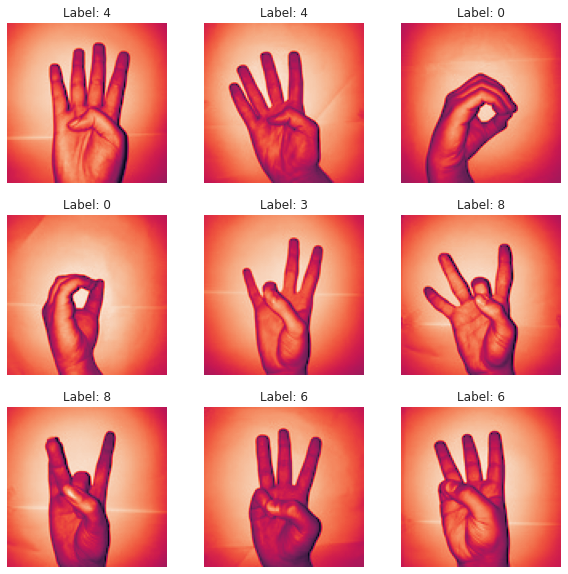

In [21]:
# plot rgb images
def visualize_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image(x_train[i*100], label="Label: " + str(y_train[i*100]))

In [22]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [30]:
# model 1 grayscale with 94%
from sklearn.model_selection import KFold

acc_per_fold = []
loss_per_fold = []
num_folds, fixed = 5,5
# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

def create_model_1(num_folds, fixed):

  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  model = Sequential()
  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(inputs, targets):
    model = Sequential([
          tf.keras.layers.Input(shape=(100,100,1)),
          tf.keras.layers.Lambda(lambda x: x/255.0),
          Conv2D(64,(9,9),padding = 'same'),
          Dropout(0.1),
          Conv2D(32,(5,5)),
          MaxPool2D((3,3)),
          BatchNormalization(),
          Conv2D(16,(3,3)),
          AvgPool2D((3,3)),
          Conv2D(4,(3,3),padding = 'same'),
          MaxPool2D((3,3)),
          Flatten(),
          Dense(64,activation = 'linear'),
          Dense(32,activation = 'tanh'),
          Dense(16,activation = 'relu'),
          Dense(10,activation = 'softmax')
          ])
    # print(model.summary())

    model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {num_folds- (fixed-1)} ...')
    history = model.fit(inputs[train], targets[train],
              batch_size= 32,
              epochs= 50
        # validation_data=(inputs[test], targets[test])
    )

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {num_folds- (fixed -1)}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    num_olds = num_folds + 1
  return model  

model_1 = create_model_1(num_folds,fixed)
print (f"total scores for k-fold -->  {acc_per_fold}")
print (f"total losses for k-fold -->  {loss_per_fold}")
score = sum(acc_per_fold)/num_folds
loss = sum(loss_per_fold)/num_folds
print (f"ِaverage accuracy -->  {score}")
print (f"ِaverage loss -->  {loss}")

model_1.save('model_1_grayscale.h5')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
52/52 [==============================] - 2s 32ms/step - loss: 2.0140 - accuracy: 0.2626
Epoch 2/50
52/52 [==============================] - 2s 32ms/step - loss: 1.4875 - accuracy: 0.5033
Epoch 3/50
52/52 [==============================] - 2s 31ms/step - loss: 1.1181 - accuracy: 0.6640
Epoch 4/50
52/52 [==============================] - 2s 32ms/step - loss: 0.8779 - accuracy: 0.7392
Epoch 5/50
52/52 [==============================] - 2s 35ms/step - loss: 0.6830 - accuracy: 0.8144
Epoch 6/50
52/52 [==============================] - 2s 34ms/step - loss: 0.5510 - accuracy: 0.8526
Epoch 7/50
52/52 [==============================] - 2s 33ms/step - loss: 0.4619 - accuracy: 0.8678
Epoch 8/50
52/52 [==============================] - 2s 36ms/step - loss: 0.3899 - accuracy: 0.8896
Epoch 9/50
52/52 [==============================] - 2s 31ms/step - loss: 0.3318 - accuracy: 0.9109
Epoch 10/50


13/13 [==============================] - 0s 12ms/step
Test Loss: 0.14373
Test Accuracy: 96.82%


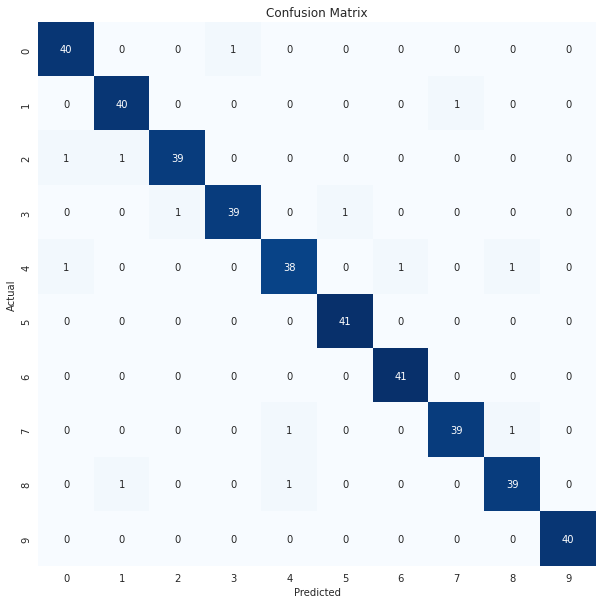

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.95      0.98      0.96        41
           2       0.97      0.95      0.96        41
           3       0.97      0.95      0.96        41
           4       0.95      0.93      0.94        41
           5       0.98      1.00      0.99        41
           6       0.98      1.00      0.99        41
           7       0.97      0.95      0.96        41
           8       0.95      0.95      0.95        41
           9       1.00      1.00      1.00        40

    accuracy                           0.97       409
   macro avg       0.97      0.97      0.97       409
weighted avg       0.97      0.97      0.97       409



In [31]:
evaluate_model(model_1, x_test, y_test)

13/13 [==============================] - 0s 20ms/step


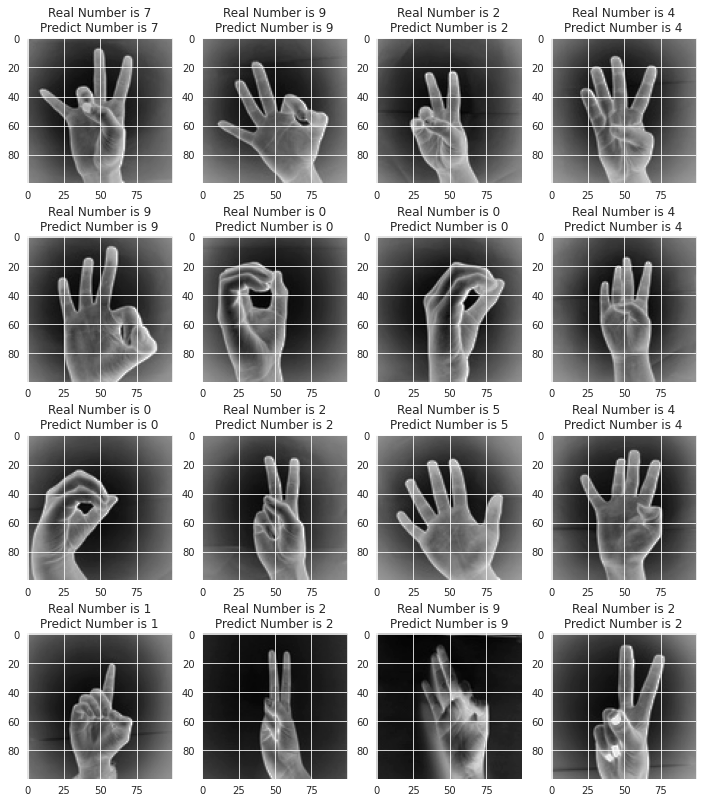

In [33]:
# Predict the value from the validation dataset
Y_pred = model_1.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
fig , axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    i = np.random.randint(0,400)
    ax.imshow(x_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {Y_pred[i].argmax()}");

In [41]:
# model 2 grayscale with 96%
from sklearn.model_selection import KFold

acc_per_fold = []
loss_per_fold = []
num_folds = 5 
fixed = 5
# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

def create_model_2(num_folds,fixed):
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  model = Sequential()
  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(inputs, targets):
    model = Sequential([
          tf.keras.layers.Input(shape=(100,100,1)),
          tf.keras.layers.Lambda(lambda x: x/255.0),
          Conv2D(8,(5,5), activation = 'relu'),
          Conv2D(16,(5,5), activation = 'relu'),
          Dropout(0.1),
          MaxPool2D((3,3)),
          Conv2D(32,(5,5),padding = 'same'),
          BatchNormalization(),
          MaxPool2D((3,3)),
          Dropout(0.1),
          Conv2D(64,(5,5)),
          Conv2D(128,(5,5), activation = 'relu'),
          Flatten(),
          Dense(128),
          Dense(64,activation = 'linear'),
          Dense(32,activation = 'relu'),
          Dense(16,activation = 'relu'),
          Dense(10,activation = 'softmax')
          ])
    
    model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {num_folds-(fixed-1)} :')
    history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs= 50
        # validation_data=(inputs[test], targets[test])
    )

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {num_folds-(fixed-1)}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    num_folds = num_folds + 1
  return model  

model_2 = create_model_2(num_folds,fixed)
print (f"total scores for k-fold -->  {acc_per_fold}")
print (f"total losses for k-fold -->  {loss_per_fold}")
score = sum(acc_per_fold)/num_folds
loss = sum(loss_per_fold)/num_folds
print (f"ِaverage accuracy -->  {score}")
print (f"ِaverage loss -->  {loss}")
model_2.save('model_2_grayscale.h5')

------------------------------------------------------------------------
Training for fold 1 :
Epoch 1/50
52/52 [==============================] - 1s 12ms/step - loss: 1.8166 - accuracy: 0.3287
Epoch 2/50
52/52 [==============================] - 1s 11ms/step - loss: 0.7989 - accuracy: 0.7562
Epoch 3/50
52/52 [==============================] - 1s 11ms/step - loss: 0.3939 - accuracy: 0.8902
Epoch 4/50
52/52 [==============================] - 1s 11ms/step - loss: 0.2783 - accuracy: 0.9078
Epoch 5/50
52/52 [==============================] - 1s 11ms/step - loss: 0.2139 - accuracy: 0.9303
Epoch 6/50
52/52 [==============================] - 1s 10ms/step - loss: 0.1082 - accuracy: 0.9679
Epoch 7/50
52/52 [==============================] - 1s 10ms/step - loss: 0.1325 - accuracy: 0.9588
Epoch 8/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1796 - accuracy: 0.9485
Epoch 9/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1315 - accuracy: 0.9594
Epoch 10/50
52

13/13 [==============================] - 0s 5ms/step
Test Loss: 0.00839
Test Accuracy: 99.51%


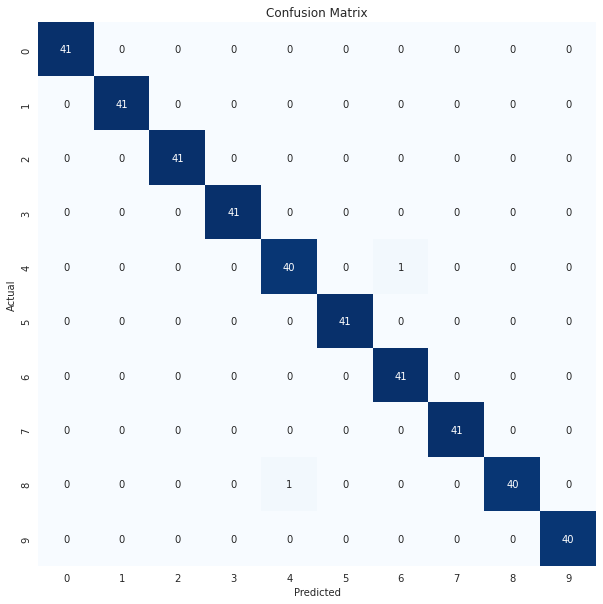

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        41
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        41
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        41
           8       1.00      0.98      0.99        41
           9       1.00      1.00      1.00        40

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409



In [42]:
evaluate_model(model_2, x_test, y_test)

13/13 [==============================] - 0s 5ms/step


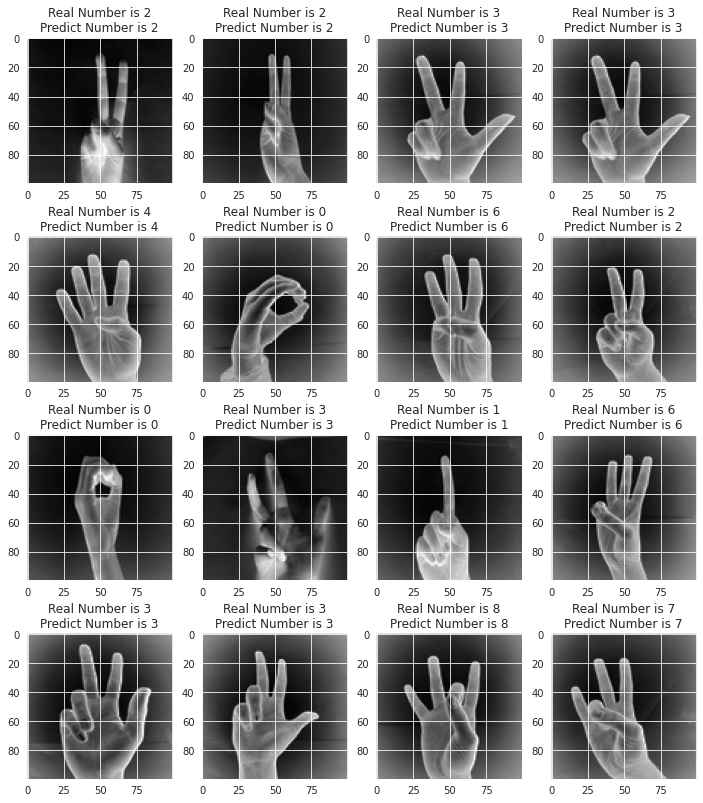

In [43]:
# Predict the value from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
fig , axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    i = np.random.randint(0,400)
    ax.imshow(x_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {Y_pred[i].argmax()}");